In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-12 06:28:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.188.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  73.6MB/s    in 0.9s    

2020-07-12 06:28:20 (73.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile
local_zip = "/tmp/cats_and_dogs_filtered.zip" ## which zip file you want to extarct
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp') ## In which location you want to store extracted files
zip_ref.close()

In [4]:
os.listdir("/tmp/cats_and_dogs_filtered")

['train', 'vectorize.py', 'validation']

In [5]:
os.listdir('/tmp/cats_and_dogs_filtered/train')

['dogs', 'cats']

In [6]:
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/cats')))
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/dogs')))

1000
1000


In [7]:
base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
## Directory with training cat pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [8]:
## File names
train_cat_filenames = os.listdir(train_cat_dir )
train_cat_filenames[:4]

['cat.955.jpg', 'cat.776.jpg', 'cat.914.jpg', 'cat.467.jpg']

In [9]:
train_dog_filenames = os.listdir(train_dogs_dir )
train_dog_filenames[:4]

['dog.119.jpg', 'dog.723.jpg', 'dog.1.jpg', 'dog.638.jpg']

### Display 10 dog and cat images randomly from train data.



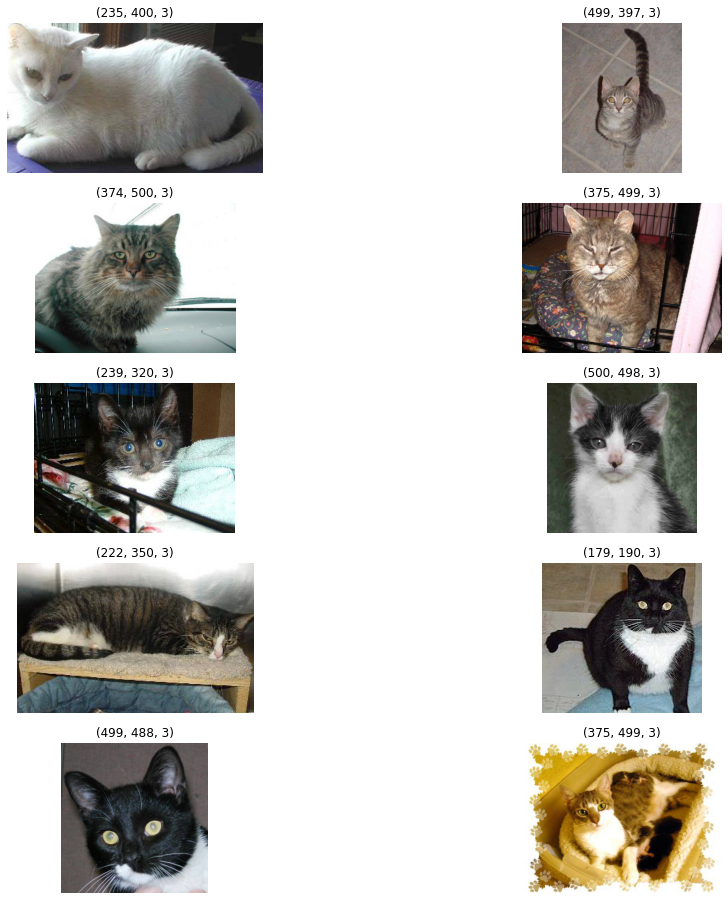

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j = 1  ## plot position
for i in range(10):
  img = plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(5,2,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j += 1

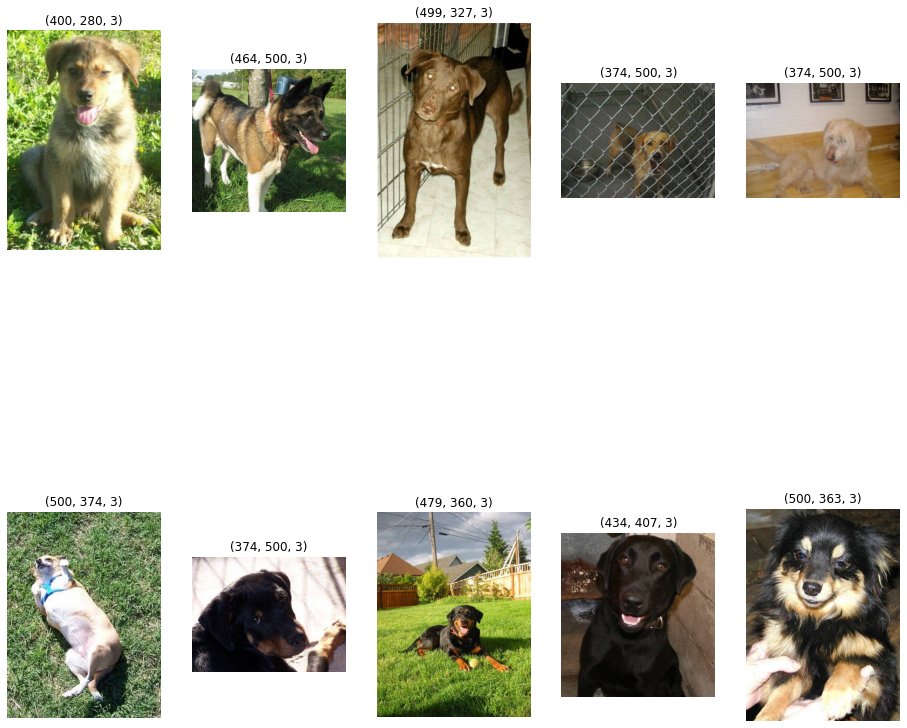

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j = 1  ## plot position
for i in range(10):
  img = plt.imread(os.path.join(train_dogs_dir,train_dog_filenames[i]))
  plt.subplot(2,5,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j += 1

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20, # 2000/20 --> 100
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


(20, 150, 150, 3)
(20,)


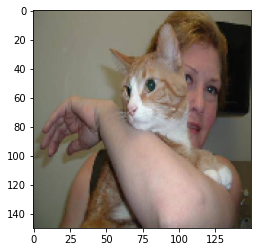

In [13]:
imgs,labels = train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

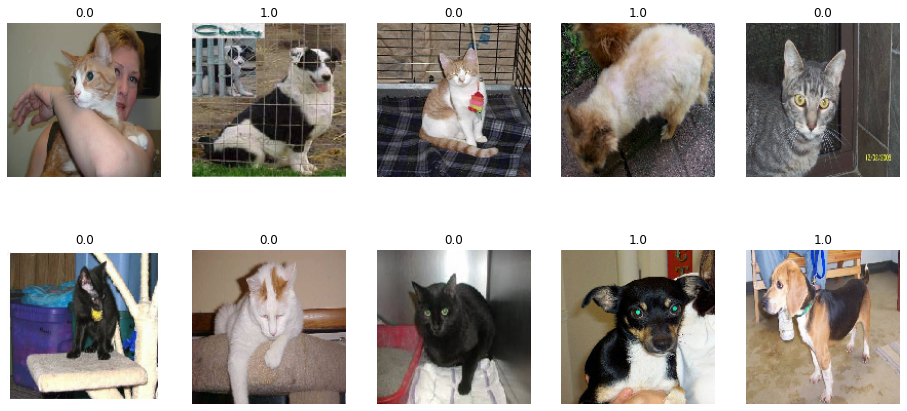

In [14]:
plt.figure(figsize=(16,16))
pos = 1  ## plot position
for i in range(10):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:]) # To display the image
  plt.title(labels[i])
  plt.axis('off')
  pos += 1

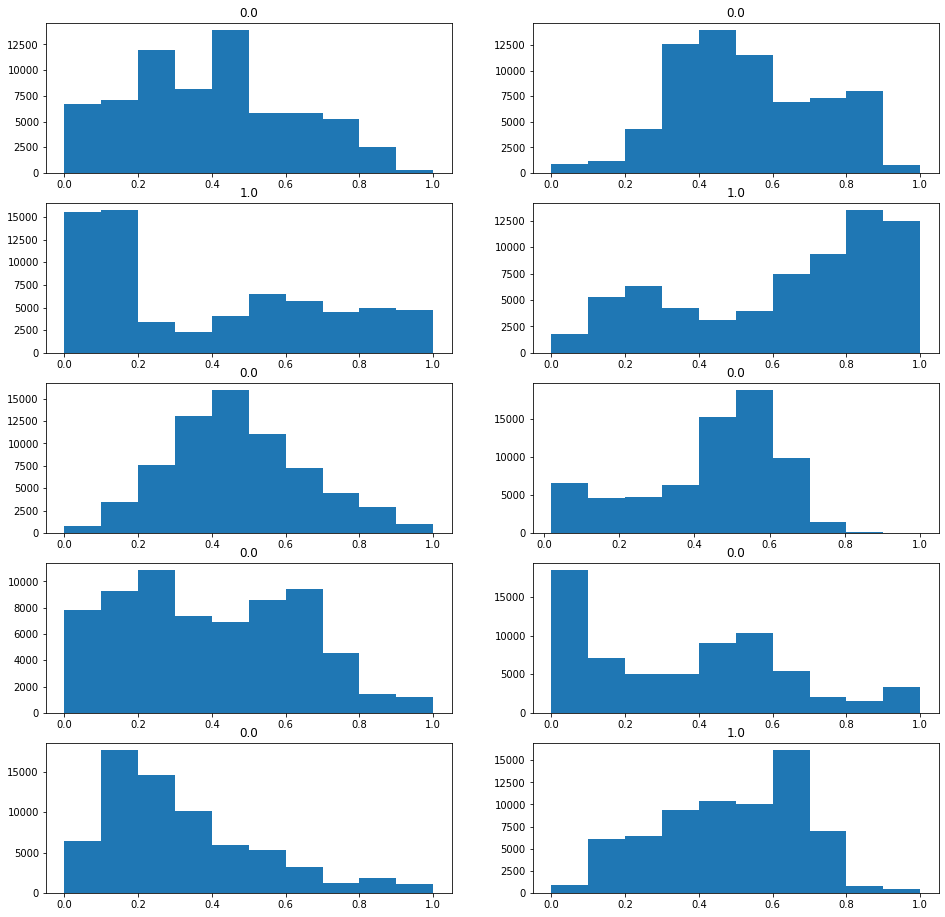

In [15]:
import matplotlib.pyplot as plt
imgs,labels = train_generator.next()
plt.figure(figsize=(16,16))
pos = 1  ## plot position
for i in range(10):
  plt.subplot(5,2,pos)
  plt.hist(imgs[i,:,:,:].flat) # To display the histogram
  plt.title(labels[i])
  pos += 1